In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#data = pd.read_csv('merged_data.csv')
data = pd.read_csv('fifth-run/feats_version_5_22_acc.csv')
data = data[~data["activity"].str.contains("jogging")]
data["activity"] = data["activity"].replace(["sitting", "lying"], "resting")

data = data.reset_index(drop=True)

result = data[data["name"].str.contains("kuba")]

result_train = data[data["name"].str.contains("kuba") == False]

result_train.drop('name', axis=1, inplace=True)
result.drop('name', axis=1, inplace=True)


X_train = result_train.iloc[:, :-1].values
labels_train = result_train.iloc[:, -1].values

X_test = result.iloc[:, :-1].values
labels_test = result.iloc[:, -1].values
#print(labels_train)
#print(labels_test)

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

labels_train1 = encoder.fit_transform(labels_train)
#print(labels_train)

labels_test1 = encoder.transform(labels_test)
#np.set_printoptions(threshold=np.inf)
#print(labels_test1)
#labels_combined = [label_train for label_pair in zip(labels_train, labels_test1) for label_train in label_pair]


X_test, X_val, labels_test1, labels_val1 = train_test_split(X_test, labels_test1, test_size=0.5, random_state=42)

X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = np.array(X_val).reshape(X_val.shape[0], X_val.shape[1], 1)

print("Wielkość zbioru X Train: ", X_train.shape)
print("Wielkość zbioru X Test: ", X_test.shape)
print("Wielkość zbioru X Validation: ", X_val.shape)
print("Wielkość zbioru Y Train: ", labels_train1.shape)
print("Wielkość zbioru Y Test: ", labels_test1.shape)
print("Wielkość zbioru Y Validation: ", labels_val1.shape)

Wielkość zbioru X Train:  (2279, 115, 1)
Wielkość zbioru X Test:  (294, 115, 1)
Wielkość zbioru X Validation:  (295, 115, 1)
Wielkość zbioru Y Train:  (2279, 6)
Wielkość zbioru Y Test:  (294, 6)
Wielkość zbioru Y Validation:  (295, 6)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 115, 32)           128       
                                                                 
 conv1d_3 (Conv1D)           (None, 115, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 58, 64)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 58, 64)            0         
                                                                 
 flatten_1 (Flatten)         (None, 3712)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1901056   
                                                      

23/23 [==============================] - 0s 17ms/step - loss: 0.0669 - accuracy: 0.9811 - val_loss: 1.5707 - val_accuracy: 0.6837
Epoch 47/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0491 - accuracy: 0.9833 - val_loss: 0.9813 - val_accuracy: 0.7653
Epoch 48/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0504 - accuracy: 0.9882 - val_loss: 0.6275 - val_accuracy: 0.8707
Epoch 49/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0612 - accuracy: 0.9833 - val_loss: 3.7683 - val_accuracy: 0.6327
Epoch 50/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0889 - accuracy: 0.9776 - val_loss: 0.7772 - val_accuracy: 0.9082
Epoch 51/100
23/23 [==============================] - 0s 18ms/step - loss: 0.1160 - accuracy: 0.9693 - val_loss: 3.0600 - val_accuracy: 0.6259
Epoch 52/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0473 - accuracy: 0.9838 - val_loss: 2.9377 - val_accuracy: 0.6293
Epoch 53/100

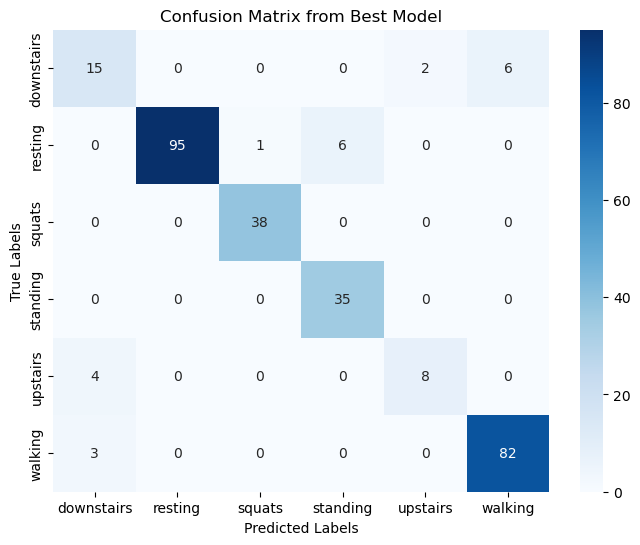

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

from sklearn.metrics import classification_report, confusion_matrix
pd.options.mode.chained_assignment = None
# Create sequential model 
cnn_model = tf.keras.models.Sequential()

#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.000000000001), input_shape = (X_train.shape[1],1)))

#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
#cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.0000000000001)))

#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.00000000000001)))

#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.1))

#Flatten the output
cnn_model.add(Flatten())

#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

#Add a dense layer with 512 neurons
#cnn_model.add(Dense(units = 128, activation=tf.keras.layers.LeakyReLU(alpha=0.9)))

#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 6, activation='softmax'))

cnn_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

[print(i.shape, i.dtype) for i in cnn_model.inputs]
[print(o.shape, o.dtype) for o in cnn_model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in cnn_model.layers]

class_mapping = {
    0: "downstairs",  # Replace with your actual class name or label
    1: "resting",
    2: "squats",
    3: "standing",
    4: "upstairs",
    5:  "walking" }

listt =[]
for key in class_mapping.values():
    listt.append(key)

class BestAccuracyCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.best_accuracy = 0.0  

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')
        if val_accuracy is not None and val_accuracy > self.best_accuracy:
            self.best_accuracy = val_accuracy
    
    def on_train_end(self, logs=None):
        print(f"Best Validation Accuracy: {self.best_accuracy * 100:.2f}%")


early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.01,  # Monitor validation accuracy
    patience=60,  # Number of epochs without improvement before stopping
    restore_best_weights=True
)
        
# Define a callback to save the model with the best validation accuracy
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='najlepszy_model_CNN.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Monitor validation accuracy
    save_best_only=True,       # Save only the best model
   # verbose=1
)

# Train the model with the callback
cnn_model_history = cnn_model.fit(
    X_train, labels_train1, epochs=100, batch_size=100,
    validation_data=(X_test, labels_test1),
    callbacks=[early_stopping_callback, model_checkpoint],
    verbose = 1 # Include the model checkpoint callback
)

# Load the best model
best_model = tf.keras.models.load_model('najlepszy_model_CNN.h5')

# Make predictions using the best model
y_pred = best_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to categorical labels
labels_val_categorical = np.argmax(labels_val1, axis=1)

# Generate and print the classification report
classification_rep = classification_report(labels_val_categorical, y_pred_classes, target_names=listt)
print("Classification Report from Best Model:\n", classification_rep)

# Generate and print the confusion matrix
confusion_mtx = confusion_matrix(labels_val_categorical, y_pred_classes)
print("Confusion Matrix from Best Model:\n", confusion_mtx)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=listt, yticklabels=listt)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix from Best Model')
plt.show()

10/10 [==============================] - 0s 2ms/step
Weighted Recall : 0.9319727891156463


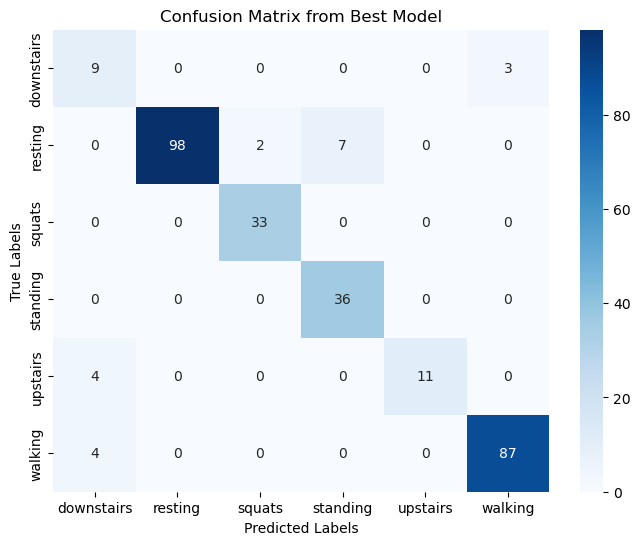

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score
# Load the best model
best_model = tf.keras.models.load_model('najlepszy_model_CNN.h5')

# Make predictions using the best model
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to categorical labels
labels_test_categorical = np.argmax(labels_test1, axis=1)

# Generate and print the classification report
#classification_rep = classification_report(labels_test_categorical, y_pred_classes, target_names=listt)
#print("Classification Report from Best Model:\n", classification_rep)

# Calculate recall
recall = recall_score(labels_test_categorical, y_pred_classes, average='weighted')
print("Weighted Recall :", recall)

# Generate and print the confusion matrix
#confusion_mtx = confusion_matrix(labels_test_categorical, y_pred_classes)
#print("Confusion Matrix from Best Model:\n", confusion_mtx)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=listt, yticklabels=listt)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix from Best Model')
plt.show()

In [9]:
class_report = classification_report(labels_test_categorical, y_pred_classes, target_names=listt)
print("Classification Report:\n", class_report)

# Calculate overall recall and accuracy
recall = recall_score(labels_test_categorical, y_pred_classes, average='weighted')
accuracy = accuracy_score(labels_test_categorical, y_pred_classes)
print("Weighted Recall:", recall)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

  downstairs       0.53      0.75      0.62        12
     resting       1.00      0.92      0.96       107
      squats       0.94      1.00      0.97        33
    standing       0.84      1.00      0.91        36
    upstairs       1.00      0.73      0.85        15
     walking       0.97      0.96      0.96        91

    accuracy                           0.93       294
   macro avg       0.88      0.89      0.88       294
weighted avg       0.94      0.93      0.93       294

Weighted Recall: 0.9319727891156463
Accuracy: 0.9319727891156463
